<a href="https://colab.research.google.com/github/erny123/HW/blob/main/Lasers2_HW2_ernestob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lasers 2 - HW2

Ernesto Barraza-Valdez
3/15/2022

In [1]:
from sympy import *
import numpy as np
from sympy.matrices import Matrix
import matplotlib.pyplot as plt

In [376]:
l = Symbol('l', real=True) #l lengt from mirror to grating
b = Symbol('b', real=True) #b length (slanted length) from grating to grating
d = Symbol('d', real=True) #grating density
c = Symbol('c', real=True) #speed of light
omega = Symbol('omega', real=True) #frequency
theta1 = Symbol('theta1', real=True) #incoming angle
theta2 = Symbol('theta2', real=True) # outgoing eangle
N = Symbol('N', real=True) # grating spacing

In [377]:
Grat1 = Matrix([[cos(theta2)/cos(theta1),0],[0,cos(theta1)/cos(theta2)]])
Grat2 = Matrix([[cos(theta1)/cos(theta2),0],[0,cos(theta2)/cos(theta1)]])
B = Matrix([[1,b],[0,1]])
L = Matrix([[1,l],[0,1]])
mir = Matrix([[1,0],[0,1]])
SagGrat = Matrix([ [1,0], [0,1] ])

Grating Matrices in tangental and sagital:

In [378]:
Grat1

Matrix([
[cos(theta2)/cos(theta1),                       0],
[                      0, cos(theta1)/cos(theta2)]])

In [381]:
SagGrat

Matrix([
[1, 0],
[0, 1]])

Matrices along length b and l, mirror

In [379]:
B

Matrix([
[1, b],
[0, 1]])

In [380]:
L

Matrix([
[1, l],
[0, 1]])

In [382]:
mir

Matrix([
[1, 0],
[0, 1]])

Now the total round trip matrix in tangental is just: 

$M_{total} = M_{grating}\cdot M_b\cdot M_{grating} \cdot M_l \cdot M_{mirror} \cdot M_l \cdot M_{grating} \cdot M_b \cdot M_{grating}$

For tangental:

In [21]:
Mtotal = Grat2*B*Grat1*L*mir*L*Grat2*B*Grat1
simplify(Mtotal)

Matrix([
[1, 2*b*cos(theta1)**2/cos(theta2)**2 + 2*l],
[0,                                       1]])

For sagittal:

In [114]:
Mtotalsag = SagGrat*B*SagGrat*L*mir*L*SagGrat*B*SagGrat
simplify(Mtotalsag)

Matrix([
[1, 2*b + 2*l],
[0,         1]])



---

##1b

The $cost(\theta_2)$ can be found using the formula for a grating below, given $d$, $N$, $\omega$, and $\theta_1$

In [22]:
cost2 = sqrt(1-(N*(2*pi*c/omega)/d - sin(theta1))**2)
cost2

sqrt(1 - (2*pi*N*c/(d*omega) - sin(theta1))**2)

Because our total matrix looks just like a ray traversing through space, we know that our total phase change is just:

$\phi(z) = j \: k \: z$

Where our $z$ is the B element in our $M_{total}$ :

In [23]:
L2 = simplify(Mtotal[1])
L2

2*b*cos(theta1)**2/cos(theta2)**2 + 2*l

Using $k = 2\pi /\lambda = \omega /c$

Our $\phi$ is

In [24]:
phi = omega/c*L2.subs(cos(theta2), cost2)
phi

omega*(2*b*cos(theta1)**2/(1 - (2*pi*N*c/(d*omega) - sin(theta1))**2) + 2*l)/c

Pluggin in our parameters

In [383]:
t1 = 80*np.pi/180
#t1= 80
dd = 1/1800*1e-3
lam = 800e-9
gamma = t1
w = 2*np.pi*c/lam

In [384]:
ncost2 = cost2.subs({theta1:t1, d:dd, N:1,pi:np.pi, omega:w})
ncost2.subs(c,3e8)

0.890393181848449

In [385]:
pphi = phi.subs({omega:w, theta1:t1, d:dd, N:1,pi:np.pi})
pphi.subs(c,3e8)

597443.286854225*b + 15707963.267949*l

This is our $\phi$ in terms of $b$ and $l$.

We now take the second derivative: $\frac{\partial^2 \phi}{\partial \omega^2}$

In [387]:
dphi = diff(phi,omega,2)
simplify(dphi)

16*pi**2*N**2*b*c*d**2*omega*(d**2*omega**2 + 3*(2*pi*N*c - d*omega*sin(theta1))**2)*cos(theta1)**2/(d**2*omega**2 - (2*pi*N*c - d*omega*sin(theta1))**2)**3

plugging in numbers

In [386]:
ddphi = dphi.subs({omega:w, theta1:t1, d:dd, N:1,pi:np.pi})
ddphi.subs(c,3e8)

1.15145192786707e-24*b

We now compare to what tracey got:

In [389]:
omega0 = Symbol('omega0', real=True) 
traecy = b/c *(1+cos(theta1))*(omega-omega0) - b*(2*pi*c/omega0)**3/(4*pi*c**2*d**2) * (omega-omega0)**2/(1-(2*pi*c/omega/d - sin(theta1))**2)
traecy

-2*pi**2*b*c*(omega - omega0)**2/(d**2*omega0**3*(1 - (2*pi*c/(d*omega) - sin(theta1))**2)) + b*(omega - omega0)*(cos(theta1) + 1)/c

In [390]:
dtraecy = diff(traecy,omega,2)

In [391]:
ttraecy = dtraecy.subs({omega0:w, theta1:t1, d:dd, N:1,pi:np.pi, omega:w})
ttraecy.subs(c,3e8)

-3.70023189129846e-24*b

Which is pretty close!

However, I beleive there is this extra perpendicular paramter that I don't want to waste anymore time on

In [65]:
G = b/sec(-theta2)
R = -2*pi*G/d*tan(-theta2)
R

2*pi*b*tan(theta2)/(d*sec(theta2))

In [67]:
RR = R.subs(theta2, acos(cost2))
RR

2*pi*b*sqrt((2*pi*N*c/(d*omega) - sin(theta1))**2)/d

In [74]:
dR = diff(RR,omega,2)
RRR = dR.subs({omega0:w, theta1:t1, d:dd, N:1,pi:np.pi, omega:w})
RRR.subs(c,3e8)

5.86708782213963e-24*b

In [72]:
diff()

0



---



##1c

Now the total round trip matrix in tangental is just: 

$M_{total} = M_{grating}\cdot M_{\delta}\cdot M_{f} \cdot M_{2f}\cdot M_{f} \cdot M_{\delta}\cdot M_{grating} \cdot M_l \cdot M_{mirror} \cdot M_l \cdot M_{grating} \cdot M_{\delta} \cdot M_{f} \cdot M_{2f}\cdot  M_{f} \cdot M_{\delta} \cdot M_{grating}$

In [93]:
delta = Symbol('delta', real=True)
f = Symbol('f', real=True)

Grat1 = Matrix([[cos(theta2)/cos(theta1),0],[0,cos(theta1)/cos(theta2)]])
Grat2 = Matrix([[cos(theta1)/cos(theta2),0],[0,cos(theta2)/cos(theta1)]])
L = Matrix([[1,l],[0,1]])
mir = Matrix([[1,0],[0,1]])
Delt = Matrix([[1,delta],[0,1]])
F = Matrix([ [1,0], [-1/f,1] ])
F2 = Matrix([[1,2*f],[0,1]])
SagGrat = Matrix([ [1,0], [0,1] ])

Our total tangental Matrix is then

In [94]:
Mtan = Grat2*Delt*F*F2*F*Delt*Grat1*L*mir*L*Grat2*Delt*F*F2*F*Delt*Grat1
simplify(Mtan)

Matrix([
[1, 2*(2*delta*cos(theta1)**2 - 2*f*cos(theta1)**2 + l*cos(theta2)**2)/cos(theta2)**2],
[0,                                                                                 1]])

And our sagittal

In [95]:
Msag = SagGrat*Delt*F*F2*F*Delt*SagGrat*L*mir*L*SagGrat*Delt*F*F2*F*Delt*SagGrat
simplify(Msag)

Matrix([
[1, 4*delta - 4*f + 2*l],
[0,                   1]])

Again, we find $\phi = k\cdot B$ where $k = \omega/c$  and $B$ is our matrix element

In [392]:
phid = simplify(Mtan[1])
phid

2*(2*delta*cos(theta1)**2 - 2*f*cos(theta1)**2 + l*cos(theta2)**2)/cos(theta2)**2

In [103]:
a = Symbol('a', real=True)
phidd = phid.subs({cos(theta2):cost2})
phiddd = phidd.subs({ delta:(f-a)})
simplify(phiddd)

2*(2*a*d**2*omega**2*cos(theta1)**2 + l*(-d**2*omega**2 + (2*pi*N*c - d*omega*sin(theta1))**2))/(-d**2*omega**2 + (2*pi*N*c - d*omega*sin(theta1))**2)

That is our $\phi(\omega)$

We now find $\phi''$

In [393]:
dphid = diff(phidd,omega,2)
dphid

16*pi*N*c*(-4*pi*N*c*l*(2*pi*N*c/(d*omega) - sin(theta1))**2/(d*omega*((2*pi*N*c/(d*omega) - sin(theta1))**2 - 1)) + l*(3*pi*N*c/(d*omega) - sin(theta1)) + (-2*delta*cos(theta1)**2 + 2*f*cos(theta1)**2 + l*((2*pi*N*c/(d*omega) - sin(theta1))**2 - 1))*(4*pi*N*c*(2*pi*N*c/(d*omega) - sin(theta1))**2/(d*omega*((2*pi*N*c/(d*omega) - sin(theta1))**2 - 1)) - 3*pi*N*c/(d*omega) + sin(theta1))/((2*pi*N*c/(d*omega) - sin(theta1))**2 - 1))/(d*omega**3*((2*pi*N*c/(d*omega) - sin(theta1))**2 - 1))

##1e

The condition that they both cancel out is simply that the $\phi''$ from each subtract and give zero. We then can find the condition for $\delta$

In [107]:
cond = simplify(dphid - dphi)

In [108]:
cond

16*pi*N*c*d**2*(12*pi**3*N**3*b*c**2*omega - 8*pi**3*N**3*c**3*delta + 8*pi**3*N**3*c**3*f - 12*pi**2*N**2*b*c*d*omega**2*sin(theta1) - 3*pi*N*b*d**2*omega**3*cos(theta1)**2 + 4*pi*N*b*d**2*omega**3 - 6*pi*N*c*d**2*delta*omega**2*cos(theta1)**2 + 6*pi*N*c*d**2*f*omega**2*cos(theta1)**2 - 2*d**3*delta*omega**3*sin(theta1)**3 + 2*d**3*delta*omega**3*sin(theta1) + 2*d**3*f*omega**3*sin(theta1)**3 - 2*d**3*f*omega**3*sin(theta1))*cos(theta1)**2/((2*pi*N*c - d*omega*sin(theta1) - d*omega)**3*(2*pi*N*c - d*omega*sin(theta1) + d*omega)**3)

We then solve for $\delta$ tp give:

In [110]:
sol  = solve(cond,delta)

In [112]:
simplify(sol[0])

(6*pi**3*N**3*b*c**2*omega + 4*pi**3*N**3*c**3*f - 6*pi**2*N**2*b*c*d*omega**2*sin(theta1) - 3*pi*N*b*d**2*omega**3*cos(theta1)**2/2 + 2*pi*N*b*d**2*omega**3 + 3*pi*N*c*d**2*f*omega**2*cos(theta1)**2 + d**3*f*omega**3*sin(theta1)**3 - d**3*f*omega**3*sin(theta1))/(4*pi**3*N**3*c**3 + 3*pi*N*c*d**2*omega**2*cos(theta1)**2 + d**3*omega**3*sin(theta1)**3 - d**3*omega**3*sin(theta1))



Next, distortion is minimized when the sagittal and tangent matrices give the same change. Thus the total tangent matrix must be equal to the total sagittal matrix:



In [117]:
Metan = simplify(Mtotal*Mtan)
Metan

Matrix([
[1, 2*(b*cos(theta1)**2 + 2*delta*cos(theta1)**2 - 2*f*cos(theta1)**2 + 2*l*cos(theta2)**2)/cos(theta2)**2],
[0,                                                                                                      1]])

In [118]:
Mesag = simplify(Mtotalsag*Msag)
Mesag

Matrix([
[1, 2*b + 4*delta - 4*f + 4*l],
[0,                         1]])

In [120]:
spatialcond = Metan[1]-Mesag[1]
spatialcond

-2*b - 4*delta + 4*f - 4*l + 2*(b*cos(theta1)**2 + 2*delta*cos(theta1)**2 - 2*f*cos(theta1)**2 + 2*l*cos(theta2)**2)/cos(theta2)**2

We can solve for $\delta$

In [123]:
scond = solve(spatialcond,delta)
scond[0]

-b/2 + f



---



---



##2

Pulse width: $\tau_p$

In [274]:
tau = Symbol('tau', real=True)
df = Symbol('\Delta f', real=True)

In [403]:
taup = 300e-12

$a$ parameter:

From equation 9.4:

$\tau_p = \sqrt{2\: ln2 /a}$

Solve for $a$


In [404]:
a = 2*np.log(2)/taup**2
a

1.5403270679109894e+19

We can calculate bandwidth from eq 9.13

$\Delta f_p \tau_p = 0.44 \times \sqrt{1+ (b/a)^2}$

For transform limited :

$\Delta f_p \:\tau_p = 0.44 $

$→ \Delta f_p = 0.44 /\tau_p $

In [405]:
tlimited = 3e-12

In [406]:
fband = 0.44/tlimited
fband

146666666666.66666

In [407]:
fband*taup

44.0

In [409]:
b = np.sqrt((fband*taup/(2*np.log(2)/np.pi))**2-1)*a
b

1.5358125009520715e+21

Thus our chirp parameter is $b = 1.5\times 10^{21}$



---
##2b

Using Equation 9.80

$a(z) = \frac{a_0 (1+K\: a_0) + K b_0^2}{(1+ K a_0)^2 + (Kb_0)^2}$

Where 

$K = 8 ln(G_0) / \Delta\omega_a^2$


In [282]:
Go = 1e7
deltaw = 120e9 * 2 *np.pi

K = 8* np.log(Go)/(deltaw**2)
K


2.268200735299325e-22

In [283]:
an = (a*(1+K*a)+ K*b**2 ) / ( (1+ K*a)**2 + (K*b)**2 )
an

4.878471372587807e+20

We can then use eq 9.4 to find our new pulsewidth

In [284]:
taupnew = np.sqrt(2*np.log(2)/an)
taupnew

5.33071971088719e-11



---
##2c

Using equation (9.75)

$\frac{1}{\Gamma(z)} = \frac{1}{\Gamma_0} + 2\alpha_m''(\omega) z = \frac{1}{\Gamma_0} + K $

Where 

$\Gamma = a + j\cdot b$

Setting imaginary parts on each side of equation equal:

$\frac{b_{new}}{b_{new}^2+ a_{new}^2} = \frac{b_{old}}{b_{old}^2+ a_{old}^2}$

In [262]:
aold = Symbol('aold', real=True)
bold = Symbol('bold', real=True)
anew = Symbol('anew', real=True)
bnew = Symbol('bnew', real=True)


In [265]:
sol = solve(bnew/(bnew**2 + anew**2) - bold/(bold**2 + aold**2),bnew)[1]
sol

(aold**2 + bold**2 + sqrt((-2*anew*bold + aold**2 + bold**2)*(2*anew*bold + aold**2 + bold**2)))/(2*bold)

In [269]:
bn = sol.subs({aold:a, bold:b, anew:an})
bn

1.36111401555921e+21

In [286]:
bn = N(bn,5)
bn

1.3611e+21

In [291]:
float(bn)

1.3611139081809303e+21

Thus our new chirp paramter is $ b = 1.361 \times 10^{21}$

##2d

We can calculate bandwidth from eq 9.13

$\Delta f_p \tau_p = 0.44 \times \sqrt{1+ (b/a)^2}$

$→ \Delta f_p = 0.44\times \sqrt{1+ (b/a)^2} /\tau_p $

In [293]:
dfnew = 0.44*np.sqrt(1+float(bn/an)**2)/taupnew

In [289]:
(bn/an).evalf()

2.79004180659755

Then to find the minimum pulse width we need to find the transform-limited pulse so that: 

$\Delta f_p \tau_{limited} = 0.44$

In [295]:
taulimnew = 0.44 / dfnew
taulimnew

1.798586981282635e-11

So around 18 ps!




---
#3a
We want to convert a transform-limited gaussian with 100fs pulsewidth at 800 nm to a 1 ns pulsewidth using double pass negative GVD grating pair. Assuming no initial chirp $b=0$

Using groove density of $d = \frac{1}{1800} mm = \frac{1}{1800\cdot 1000} m^{-3}$

We want to find minimum grating spacing



In [2]:
d = 1/1800/1000 #groove density
tp0 = 100e-15  #original pulsewidth
lam = 800e-9 #wavelength
tp1 = 1e-9 #stretched pulsewidth

For a double pass negative GVD grating, Tracey's paper (and the notes) gives:

$\frac{d^2 \phi}{d\omega^2} = \frac{- N^2 \lambda^3 \:b}{2\:c^2d^2cos^2(\theta_{out})} = \beta''\: L$

And using equation 9.65 from the book (assuming z=L): 

$\tau_p^2(z) = \tau_{p0}^2 + \left( \frac{(4 \: ln2)\beta''\: z}{\tau_{p0}} \right)^2 =  \tau_{p0}^2 + \frac{(4 \: ln2)^2}{\tau_{p0}^2} \left( \frac{- N^2 \lambda^3 \:b}{2\:c^2d^2cos^2(\theta_{out})} \right)^2  $ 

Assuming our beam is coming out on optical axis then $cos^2(\theta_{out}) → 1$

Thus:

$ N^2 = \left( \tau_{p0}^2 + \tau_p^2(z) \right)\cdot \frac{\tau_{p0}^2}{(4 \: ln2)^2} \cdot \left( \frac{2\:c^2d^2\cdot 1}{\lambda^3 \:b} \right)^2   $

We don't have $b$ the slanted length between the two gratings so we'll leave it in terms of $b$

In [6]:
N2 = (tp0**2 + tp1**2) * tp0**2/(4*np.log(2))**2 * (2* (2.988e8)**2 * d**2 / (lam**3))**2
N = np.sqrt(N2)
N

3.8823149165537894

Therefore our grating spacing must be: 

$N \approx 3.88 \: b^{-1}$

##3b

Instead we are now using a 1 ps pulse and what is the new pulsewidth?

We will use equation 9.65 with our new given N

In [11]:
bb = Symbol('bb', real=True) #our 'b' parameter

betaL = ( N**2 * lam**3 / (2 * (2.998e8)**2 * d**2 ) ) ## beta'' * L

taup0 = 1e-12

taup22 = taup0**2 + (4 * np.log(2)/taup0)**2 * betaL**2 * bb**2

taup2 = sqrt(taup22)
taup2

3.85645876455435e-10*sqrt(bb**2 + 6.72392121319221e-6)

For a $b = 1$:

In [13]:
taup2.subs(bb,1)

3.85647172979500e-10

In [14]:
taup2.subs(bb,1)/taup0

385.647172979500

For a 1 ps pulse, given the grating spacing found in part a, the pulse is expanded by 385.6 times!

This is as opposed to part a, where the pulse expanded by 10,000 times. So no, it was not expected. 



---
##4a

For Gaussian:

$I \propto exp\left[ -4\: ln2  \: (\frac{t}{\tau_p})^2 \right]$

For a $sech^2$ pulse:

$I \propto sech^2(1.7627 \cdot t/\tau_p) = 1/cosh^2(1.7627 \cdot t/\tau_p) $

For a decaying exponential:

$I \propto exp(-2t/\tau_p)$

In [329]:
taup = 1e-12

In [330]:
t = np.arange(-1e-11,1e-11,10e-15)
I = np.exp(-4 * np.log(2) *(t/taup)**2)
II = I**2

In [331]:
dt = t[1]-t[0]
dt

1.000000000000016e-14

In [356]:
2/np.sqrt(2)

1.414213562373095

In [332]:
denom = np.trapz(II, dx=dt)

In [333]:
ac = np.correlate(I,I,mode='full')

In [334]:
acorr =dt* ac/denom

$sech^2(1.7627 \cdot t/\tau_p)$ 

In [364]:
Isec = 1/np.cosh(1.7627*t/taup)**2
IIsec = Isec**2

In [365]:
denomsec = np.trapz(IIsec, dx=dt)
acsec = np.correlate(Isec,Isec,mode='full')
acorrsec = dt*acsec/denomsec

$exp(-2t/\tau_p)$

In [366]:
Idec = np.exp(-2*t/taup)
IIdec = Idec**2

In [367]:
denomdec = np.trapz(IIdec, dx=dt)
acdec = np.correlate(Idec,Idec,mode='full')
acorrdec = dt*acdec/denomdec

plot

([<matplotlib.axis.XTick at 0x7f8edbd37dd0>,
 <a list of 12 Text major ticklabel objects>)

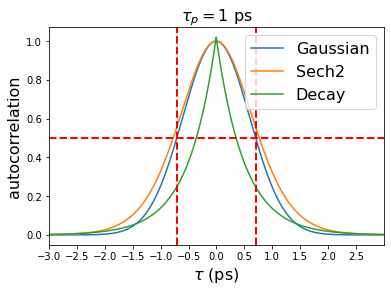

In [374]:
ttau = np.arange(-int(acorr.size)*dt/2, int(acorr.size)*dt/2,dt)
plt.plot(ttau/1e-12,acorr, label="Gaussian")
plt.plot(ttau/1e-12,acorrsec, label = "Sech2")
plt.plot(ttau/1e-12,acorrdec,label = "Decay")
plt.xlim([-3,3])

plt.legend(fontsize=16)
plt.ylabel("autocorrelation",fontsize = 16)
plt.xlabel("$\\tau$ (ps)",fontsize=16)
plt.title("$\\tau_p = 1$ ps",fontsize = 16)
plt.axhline(y=0.5, color='r', linestyle = '--', linewidth=2)
plt.axvline(x=1/np.sqrt(2), color='r', linestyle = '--', linewidth=2)
plt.axvline(x=-1/np.sqrt(2), color='r', linestyle = '--', linewidth=2)
plt.xticks(np.arange(-3,3, 0.5))

Thus the fwhm's are:

$fwhm(A^2_{gauss}) \approx 1.41 \: ps$

$fwhm(A^2_{sech2}) \approx 1.54 \: ps$

$fwhm(A^2_{Decay}) \approx 1.1 \: ps$

## 4b

In the previous section we found the pulsewidth converstion factor from intensity to autocorrelation pulse width for a gaussian, sech2, and decay function as 1.52, 1.54, and 1.1 respectively. 

Thus for $\tau_p = 100 fs$ we just need to multiply by the autocorrelation factor to get the autocorrelation pulsewidth. Then we multiply by the speed of light to get the total length we need to move in order to make an autocorrelation measurement. 

For Gaussian:

In [410]:
100e-15 *1.41 * 2.988e8

4.21308e-05

Thus $42 \: \mu m$ for gaussian

For Sech2:

In [411]:
100e-15 *1.54 * 2.988e8

4.60152e-05

Thus $46 \: \mu m$ for sech2

For Decay:

In [412]:
100e-15 *1.1* 2.988e8

3.2868000000000004e-05

Thus $33 \: \mu m$ for decay

##4c

The following pulse information is lost using the interferometric autocorrelation measurements: 



*   phase
*   intensity
*   pulse shape (we can only tell the FWHM)

